In [59]:
#importing basic libraries
import numpy as np
import pandas as pd
data = pd.read_csv('diabetic_data.csv')
data.shape

(101766, 50)

In [60]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

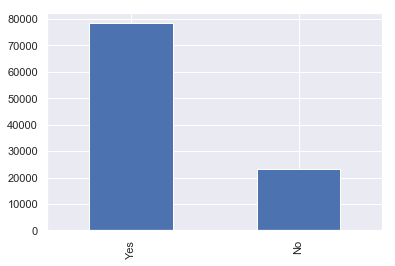

In [63]:
#patients who take diabetic medicine
data.diabetesMed.value_counts().plot(kind = 'bar')

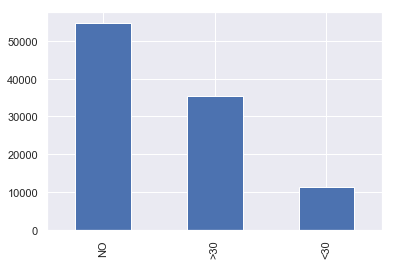

In [65]:
#patients with different readmission timings
data.readmitted.value_counts().plot(kind = 'bar')

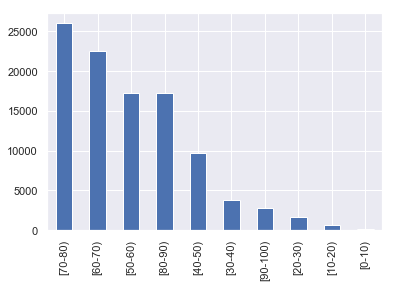

In [66]:
#showing patients age
data.age.value_counts().plot(kind = 'bar')

In [67]:
data=data[data.diabetesMed=='Yes']
data.shape

(78363, 50)

In [68]:
data=data[data.readmitted=='NO']
data.shape

(40934, 50)

In [69]:
data=data[~data.discharge_disposition_id.isin([11,13,14,19,20])]
data.shape

(39355, 50)

In [70]:
data = data.drop(['medical_specialty','payer_code','weight'],axis=1)

In [71]:
data['race']=data.race.replace('?',np.nan)
data['race'].fillna(data['race'].mode()[0], inplace=True)
data.race.isnull().sum()

0

In [72]:
treatments = data[['encounter_id','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
       'citoglipton','insulin', 'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']].copy()
treatments.head()

,encounter_id,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
2,64410,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,No,No,No,No,No,No
3,500364,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
4,16680,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,Steady,No,No,No,No,No
6,55842,Steady,No,No,No,Steady,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
8,12522,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,Steady,No,No,No,No,No


In [73]:
treatments=treatments.replace(['No','Steady','Up','Down'],[0,1,1,1])
treatments.set_index('encounter_id',inplace=True)
treatments.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
encounter_id,,,,,,,,,,,,,,,,,,,,,
64410,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16680,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
55842,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12522,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [74]:
#checking the maximum combination of drugs a patient takes
treatments.sum(axis=1).value_counts()

1    23080
2    11397
3     4108
4      730
5       39
6        1
dtype: int64

In [75]:
#categorizing diabetic treatments
i1 = treatments[treatments['insulin']==1].sum(axis = 1).replace([1,2,3,4,5,6],['insulin','io','io','io','io','io'])
i1.value_counts()

insulin    14675
io         12145
dtype: int64

In [76]:
i0=treatments[treatments['insulin']==0].sum(axis=1).replace([0,1,2,3,4,5,6],['no med','other','other','other','other','other','other'])
i0.value_counts()

other    12535
dtype: int64

In [77]:
treatments=pd.concat([i1,i0])
treatments = pd.DataFrame({'treatments':treatments})
treatments.head()

,treatments
encounter_id,
500364,insulin
16680,io
55842,io
12522,io
15738,io


In [78]:
#adding treatment column to our dataset
data=data.join(treatments,on='encounter_id')
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,treatments
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,other
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,insulin
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,io
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,Steady,No,No,No,No,No,Ch,Yes,NO,io
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,Steady,No,No,No,No,No,Ch,Yes,NO,io


In [79]:
#dropping the various medicines because of treatment column
data = data.drop(['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],axis=1)

In [80]:
data=data[data.treatments!='other']
data.shape

(26820, 25)

In [81]:
#creating dummmy variables
data = pd.get_dummies(data, columns=['race', 'gender','max_glu_serum', 'A1Cresult', 'change',
       'diabetesMed', 'readmitted'])
data.head()

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_Yes,readmitted_NO
3,500364,82442376,[30-40),1,1,7,2,44,1,16,...,1,0,0,0,1,0,1,0,1,1
4,16680,42519267,[40-50),1,1,7,1,51,0,8,...,1,0,0,0,1,0,1,0,1,1
6,55842,84259809,[60-70),3,1,2,4,70,1,21,...,1,0,0,0,1,0,1,0,1,1
8,12522,48330783,[80-90),2,1,4,13,68,2,28,...,1,0,0,0,1,0,1,0,1,1
9,15738,63555939,[90-100),3,3,4,12,33,3,18,...,1,0,0,0,1,0,1,0,1,1


In [23]:
data.age.value_counts()

[70-80)     6171
[60-70)     5982
[50-60)     4986
[80-90)     3834
[40-50)     2860
[30-40)     1226
[90-100)     677
[20-30)      630
[10-20)      348
[0-10)       106
Name: age, dtype: int64

In [82]:
#encoding age feature
labels = data['age'].astype('category').cat.categories.tolist()
replace_age = {'age' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_age)

{'age': {'[0-10)': 1, '[10-20)': 2, '[20-30)': 3, '[30-40)': 4, '[40-50)': 5, '[50-60)': 6, '[60-70)': 7, '[70-80)': 8, '[80-90)': 9, '[90-100)': 10}}


In [25]:
data.replace(replace_age, inplace=True)
data.age.value_counts()

8     6171
7     5982
6     4986
9     3834
5     2860
4     1226
10     677
3      630
2      348
1      106
Name: age, dtype: int64

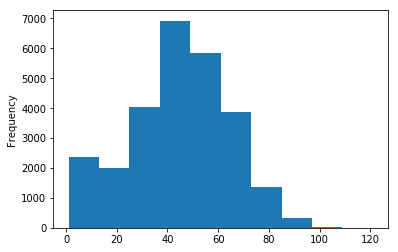

In [26]:
data.num_lab_procedures.plot(kind='hist')

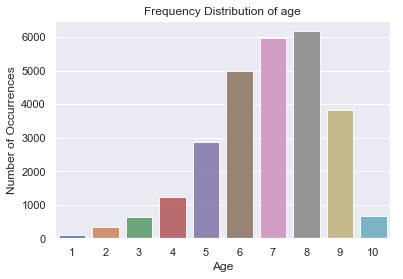

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
age_count = data['age'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of age')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

In [28]:
data = data.drop(['diag_1','diag_2','diag_3'],axis = 1)
data.columns

Index(['encounter_id', 'patient_nbr', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'treatments', 'race_AfricanAmerican', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Female',
       'gender_Male', 'max_glu_serum_>200', 'max_glu_serum_>300',
       'max_glu_serum_None', 'max_glu_serum_Norm', 'A1Cresult_>7',
       'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'change_Ch',
       'change_No', 'diabetesMed_Yes', 'readmitted_NO'],
      dtype='object')

In [29]:
d = data.drop(['diabetesMed_Yes','readmitted_NO'],axis=1)
corr = d.corr().round(2)
corr

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No
encounter_id,1.00,0.55,0.11,-0.13,-0.09,-0.09,-0.06,-0.04,-0.02,0.05,...,-0.11,-0.10,0.19,-0.11,0.03,-0.06,-0.00,0.06,0.10,-0.10
patient_nbr,0.55,1.00,0.08,-0.02,-0.07,-0.04,-0.03,-0.00,-0.01,0.01,...,-0.08,-0.06,0.13,-0.08,0.02,-0.06,0.01,0.05,0.09,-0.09
age,0.11,0.08,1.00,0.00,0.11,0.05,0.16,0.03,0.01,0.13,...,0.05,-0.00,-0.05,0.05,0.03,-0.21,0.15,-0.00,0.03,-0.03
admission_type_id,-0.13,-0.02,0.00,1.00,0.15,0.04,0.01,-0.17,0.15,0.12,...,0.24,0.22,-0.39,0.22,-0.01,-0.05,0.07,-0.05,0.04,-0.04
discharge_disposition_id,-0.09,-0.07,0.11,0.15,1.00,0.03,0.18,0.03,0.04,0.14,...,0.06,0.04,-0.08,0.03,0.00,-0.02,0.02,-0.00,0.03,-0.03
admission_source_id,-0.09,-0.04,0.05,0.04,0.03,1.00,0.00,0.00,-0.16,-0.08,...,0.34,0.29,-0.57,0.35,-0.01,-0.00,0.01,-0.00,0.01,-0.01
time_in_hospital,-0.06,-0.03,0.16,0.01,0.18,0.00,1.00,0.34,0.23,0.49,...,0.02,0.02,-0.01,-0.02,0.04,0.01,-0.06,0.06,0.09,-0.09
num_lab_procedures,-0.04,-0.00,0.03,-0.17,0.03,0.00,0.34,1.00,0.08,0.28,...,-0.14,-0.10,0.24,-0.16,0.11,0.19,-0.28,0.15,0.04,-0.04
num_procedures,-0.02,-0.01,0.01,0.15,0.04,-0.16,0.23,0.08,1.00,0.46,...,-0.04,-0.05,0.08,-0.04,0.02,-0.03,0.01,0.00,0.02,-0.02
num_medications,0.05,0.01,0.13,0.12,0.14,-0.08,0.49,0.28,0.46,1.00,...,0.00,-0.01,0.02,-0.02,0.04,-0.05,0.00,0.04,0.20,-0.20


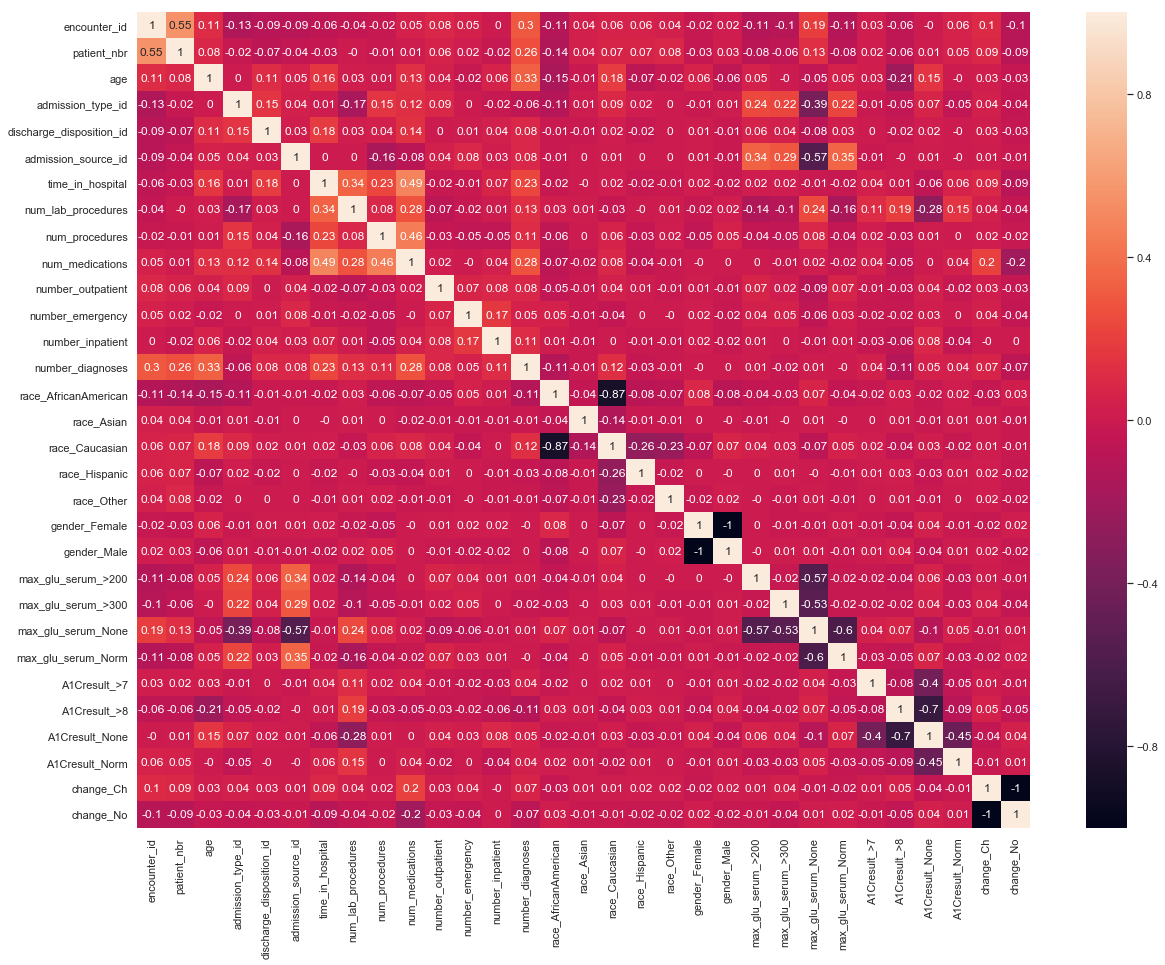

In [30]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [83]:
#splitting the data
X = data.drop(['encounter_id','patient_nbr','num_lab_procedures','number_outpatient','number_emergency',
                      'race_Asian','race_Other','diabetesMed_Yes','max_glu_serum_>200','A1Cresult_>8','A1Cresult_Norm',
                      'readmitted_NO','treatments'],axis=1)
Y = data['treatments']
print(X.shape)
print(Y.shape)

(26820, 24)
(26820,)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18774, 21), (8046, 21), (18774,), (8046,))

In [84]:
#Logistic Regression
m1=LogisticRegression()
m1.fit(X_train,y_train)
y_pred_lr=m1.predict(X_test)
Train_Score_lr = m1.score(X_train,y_train)
Test_Score_lr = accuracy_score(y_test,y_pred_lr)


print('Training Accuracy is:',Train_Score_lr)
print('Testing Accuracy is:',Test_Score_lr)
print(classification_report(y_test,y_pred_lr))

C:\DataScience\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Accuracy is: 0.7737296260786194
Testing Accuracy is: 0.7668406661695252
              precision    recall  f1-score   support

     insulin       0.94      0.61      0.74      4375
          io       0.67      0.96      0.79      3671

   micro avg       0.77      0.77      0.77      8046
   macro avg       0.81      0.78      0.76      8046
weighted avg       0.82      0.77      0.76      8046



In [85]:
#KNN
m2 = KNeighborsClassifier()
m2.fit(X_train,y_train)
y_pred_knn = m2.predict(X_test)
Train_Score_knn = m2.score(X_train,y_train)
Test_Score_knn = accuracy_score(y_test,y_pred_knn)

print('Training Accuracy is :',Train_Score_knn)
print('Testing Accuracy is:',Test_Score_knn)
print(classification_report(y_test,y_pred_knn))

Training Accuracy is : 0.7963140513476084
Testing Accuracy is: 0.6713895103156848
              precision    recall  f1-score   support

     insulin       0.72      0.65      0.68      4375
          io       0.63      0.70      0.66      3671

   micro avg       0.67      0.67      0.67      8046
   macro avg       0.67      0.67      0.67      8046
weighted avg       0.68      0.67      0.67      8046



In [86]:
#BernoulliNB
m3=BernoulliNB()
m3.fit(X_train,y_train)
y_pred_bnb=m3.predict(X_test)
Train_Score_bnb = m3.score(X_train,y_train)
Test_Score_bnb = accuracy_score(y_test,y_pred_bnb)

print('Training Accuracy :',Train_Score_bnb)
print('Testing Accuracy  :',Test_Score_bnb)
print(classification_report(y_test,y_pred_bnb))

Training Accuracy : 0.7635559816767871
Testing Accuracy  : 0.7555306984837186
              precision    recall  f1-score   support

     insulin       1.00      0.55      0.71      4375
          io       0.65      1.00      0.79      3671

   micro avg       0.76      0.76      0.76      8046
   macro avg       0.83      0.78      0.75      8046
weighted avg       0.84      0.76      0.75      8046



In [99]:
#Decision Trees
m4 = DecisionTreeClassifier()
m4.fit(X_train,y_train)
y_pred_dt=m4.predict(X_test)
Train_Score_dt = m4.score(X_train,y_train)
Test_Score_dt = accuracy_score(y_test,y_pred_dt)

print('Training Accuracy :',Train_Score_dt)
print('Testing Accuracy :',Test_Score_dt)
print(classification_report(y_test,y_pred_dt))


Training Accuracy : 0.9965910301480772
Testing Accuracy : 0.6978622918220234
              precision    recall  f1-score   support

     insulin       0.72      0.74      0.73      4375
          io       0.67      0.65      0.66      3671

   micro avg       0.70      0.70      0.70      8046
   macro avg       0.70      0.69      0.69      8046
weighted avg       0.70      0.70      0.70      8046



In [100]:
#Random Forest
m5 = RandomForestClassifier()
m5.fit(X_train,y_train)
y_pred_rf=m5.predict(X_test)
Train_Score_rf = m5.score(X_train,y_train)
Test_Score_rf = accuracy_score(y_test,y_pred_rf)

print('Training Accuracy :',Train_Score_rf)
print('Testing Accuracy :',Test_Score_rf)
print(classification_report(y_test,y_pred_rf))

C:\DataScience\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy : 0.9883349312879515
Testing Accuracy : 0.7357693263733532
              precision    recall  f1-score   support

     insulin       0.78      0.72      0.75      4375
          io       0.69      0.75      0.72      3671

   micro avg       0.74      0.74      0.74      8046
   macro avg       0.74      0.74      0.74      8046
weighted avg       0.74      0.74      0.74      8046



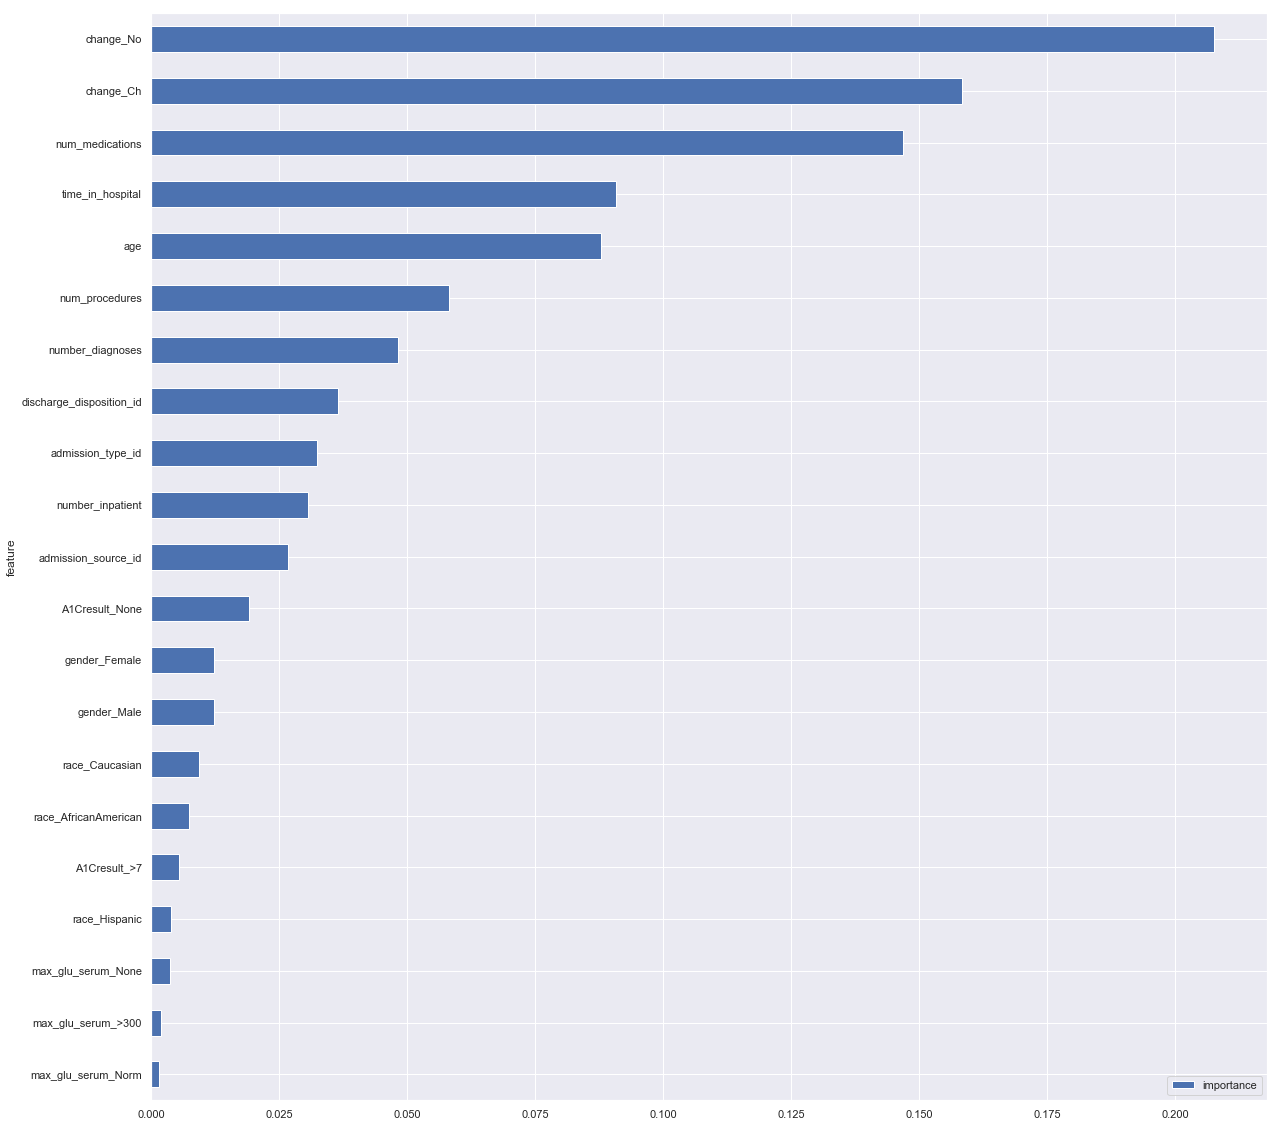

In [101]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = m5.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20,20))

In [102]:
Model_Scores=pd.DataFrame({'Models':['Logistic Regression','KNN','Bernauli Naives Bayes','Decision Tree','Random Forest'],
             'Training Accuracy':[Train_Score_lr,Train_Score_knn,Train_Score_bnb,Train_Score_dt,Train_Score_rf],
             'Testing Accuracy':[Test_Score_lr,Test_Score_knn,Test_Score_bnb,Test_Score_dt,Test_Score_rf],})

Model_Scores.sort_values(by=('Testing Accuracy'),ascending=False)

,Models,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.773730,0.766841
2,Bernauli Naives Bayes,0.763556,0.755531
4,Random Forest,0.988335,0.735769
3,Decision Tree,0.996591,0.697862
1,KNN,0.796314,0.671390


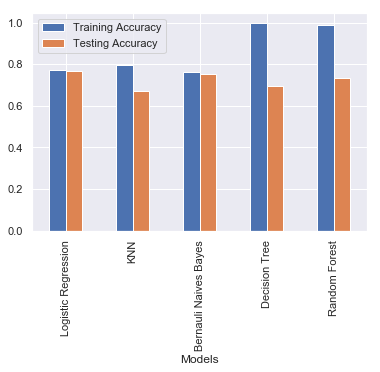

In [103]:
Model_Scores.plot(kind='bar', x='Models')